In [1]:
import datetime # date and time tools

import os, sys

import math

import random

import numpy as np
from scipy import stats
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import episiming

## Criando o cenário do Rio com redução

In [36]:
tx_reducao = 100
landscan_file = '../../../../dados/RJ/cidade_rj/dados_estatisticos/LandScan.npy'
piramide_file = 'piramide_etaria_MRJ.csv'
escolas_file = 'municipais.npy'
cenario_rio = episiming.cenarios.RiodeJaneiro(tx_reducao, landscan_file, piramide_file, escolas_file)
print(f'População do cenário reduzido: {cenario_rio.num_pop}\n')

População do cenário reduzido: 67973



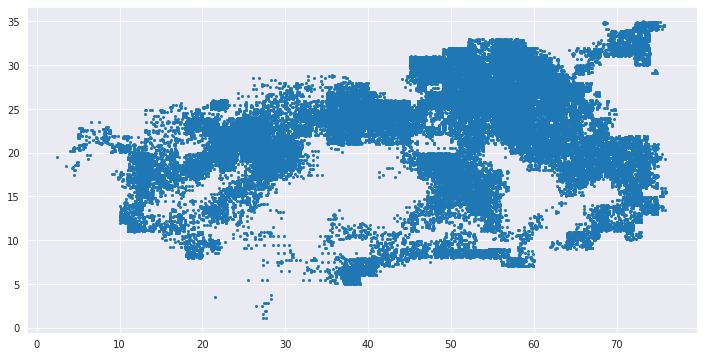

In [37]:
x, y = cenario_rio.pop_posicoes.T
plt.figure(figsize=(12,6))
plt.scatter(x, y, s=4)
plt.show()

## Carregando as informações de infectados por blocos

In [10]:
infect = np.load('infectados_total.npy')

In [14]:
new_infect = np.zeros(np.shape(infect))

In [30]:
def corrige_mtrx(mtrx):
    new_mtrx = np.zeros(np.shape(mtrx))
    for i in range(39):
        new_mtrx[np.abs(i-38)] = mtrx[i]
    return new_mtrx

In [21]:
bairros = np.load('geoloc_Bairros_MRJ.npy')

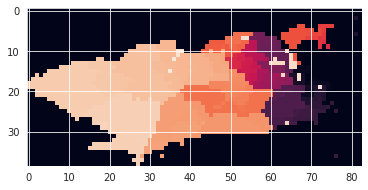

In [28]:
plt.imshow(bairros)

In [31]:
new_bairros = corrige_mtrx(bairros)

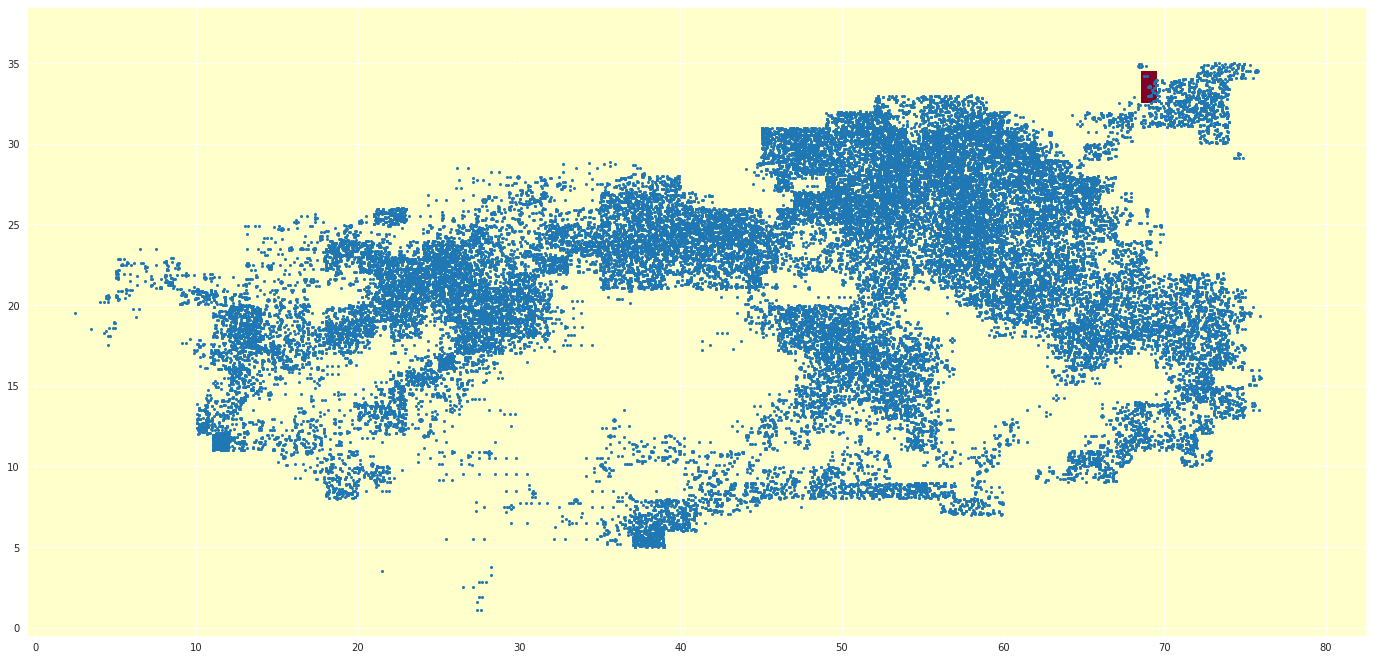

In [151]:
x, y = cenario_rio.pop_posicoes.T
plt.figure(figsize=(24,12))
plt.scatter(x, y, s=4)
plt.imshow(novo, cmap = 'YlOrRd')
# plt.imshow(new_infect)
plt.gca().invert_yaxis()
plt.show()

In [144]:
novo = np.zeros(np.shape(infect))

In [150]:
novo[33,69] = 50

In [152]:
pos_blocos = np.round(cenario_rio.pop_posicoes)

In [195]:
rng = np.arange(len(pos_blocos))

In [203]:
for x in range(83):
    for y in range(39):
        check_pos = pos_blocos == [x,y]
        verifica = [p[0] & p[1] for p in check_pos]
        indices = rng[verifica]
        qt = new_infect2[y,x]
        if (qt > 0) & (len(indices) > 0):
            escolhas = np.random.choice(indices, int(qt))
            for e in escolhas:
                cenario_rio.G_r.nodes[e]['estado'] = 2
        else:
            pass

In [155]:
a = pos_blocos == [69,33]

In [198]:
np.random.choice(c,5)

array([184, 215, 967, 964, 965])

In [199]:
c

array([181, 184, 185, 195, 196, 199, 200, 201, 202, 203, 204, 215, 936,
       941, 945, 946, 947, 964, 965, 966, 967])

In [158]:
b = [i[0] & i[1] for i in a]

In [196]:
c = rng[b]

In [191]:
new_infect2 = np.ceil(new_infect/tx_reducao)

In [139]:
pos_blocos[rng[b]]

array([[69., 34.],
       [69., 34.],
       [69., 34.],
       [69., 34.],
       [69., 34.],
       [69., 34.],
       [69., 34.],
       [69., 34.],
       [69., 34.],
       [69., 34.],
       [69., 34.],
       [69., 34.],
       [69., 34.],
       [69., 34.],
       [69., 34.],
       [69., 34.]])

In [140]:
pos_blocos[67972]

array([28.,  2.])

In [212]:
infectados = np.array([v for i,v in nx.get_node_attributes(cenario_rio.G_r,'estado').items()])

In [214]:
uns = np.ones(len(infectados))

In [216]:
np.sum(infectados-uns)

1346.0

In [55]:
cenario_rio.G_r.nodes[1]['estado'] = 2

In [ ]:
nx.set_node_attributes(cenario_rio.G_r,'estado')